# Linear Regression

The goal of this assignment is to build a simple linear regression algorithm from scratch. Linear regression is a very useful and simple to understand predicting values, given a set of training data. The outcome of regression is a best fitting line function, which, by definition, is the line that minimizes the sum of the squared errors. When plotted on a 2 dimensional coordinate system, the errors are the distance between the actual Y' and predicted Y' of the line. In machine learning, this line equation Y' = b(x) + A is solved using gradient descent to gradually approach to it. **We will be using the statistical approach here that directly solves this line equation without using an iterative algorithm.**

## Exercise 1 - Explore the Data

The `Advertising` data set consists of the sales of that product in 200 different
markets, along with advertising budgets for the product in each of those
markets for three different media: TV, radio, and newspaper. Explore the data and decide on which variable you would like to use to predict `Sales`.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Advertising.csv')

In [15]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


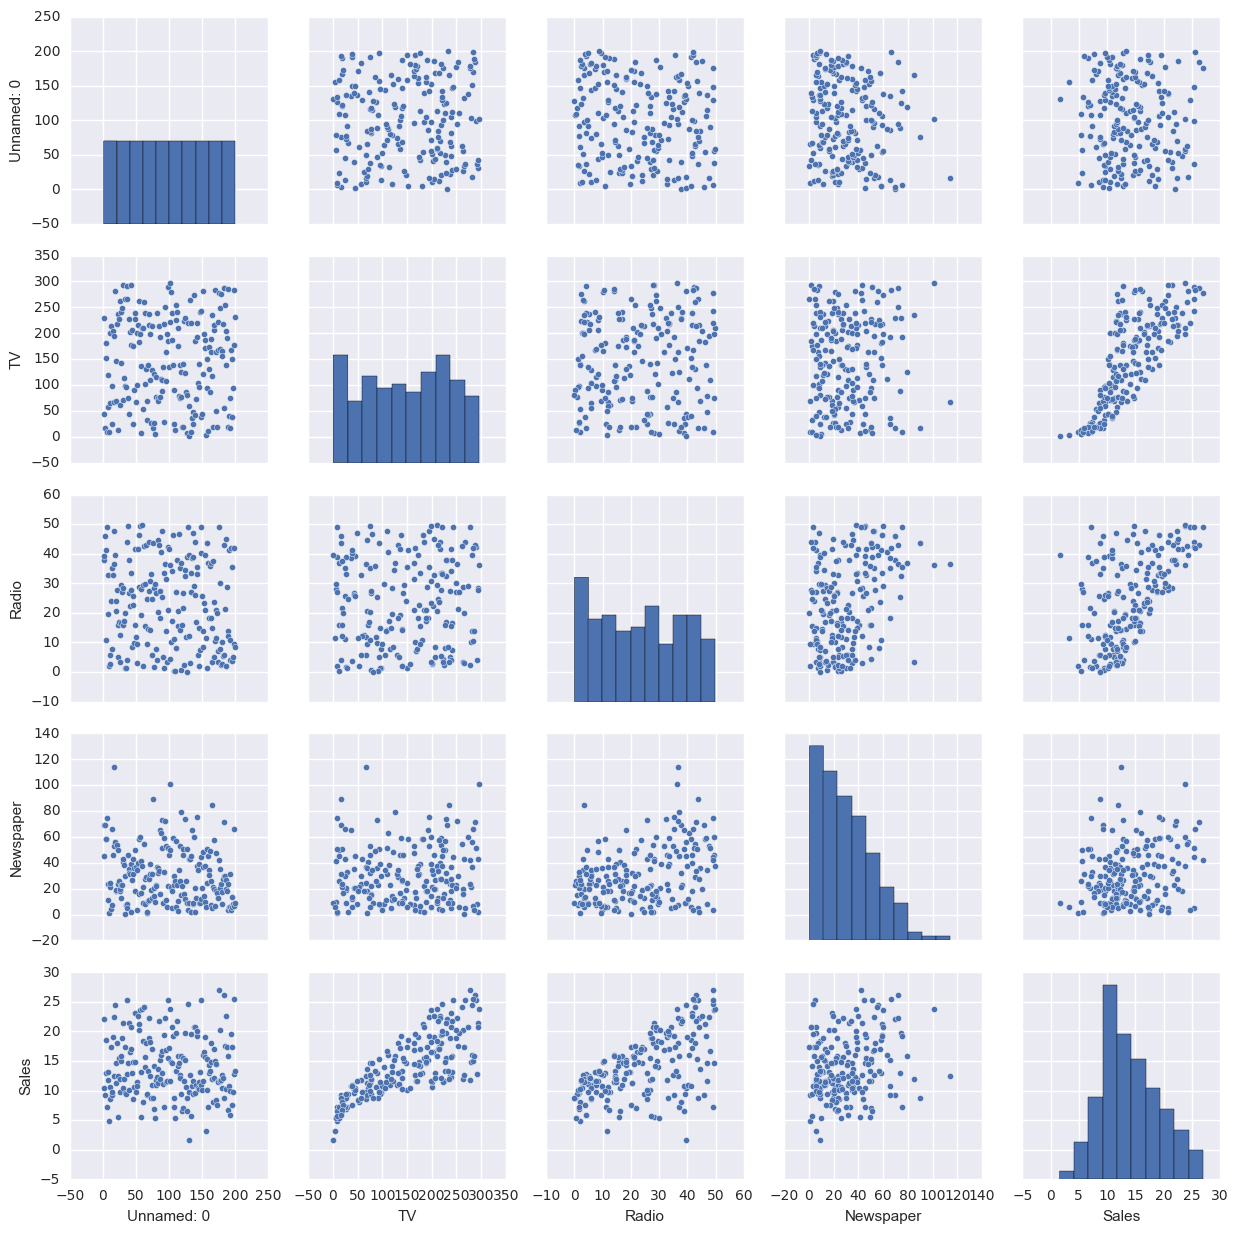

In [12]:
import seaborn as sns
sns.pairplot(df)
#it looks like the TV is the best choice, but lets check the correlation

In [14]:
df.corr()
#the TV has the highest correlation, it is the chosen feature 

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [17]:
X=df['TV']

In [18]:
y=df['Sales']

## Exercise 2 - Build a Simple Linear Regression Class

The derivation can be [found here on Wikipedia](https://en.wikipedia.org/wiki/Simple_linear_regression).

The general steps are:
- Calculate mean and variance
- Calculate covariance
- Estimate coefficients
- Make predictions on out-of-sample data

The class should do the following:
- Fit a set of x,y points
- Predict the value a new x values based on the coefficients
- Can plot the best fit line on the points
- Return the coefficient and intercept
- Return the coefficient of determination (R^2)

In [83]:
class Linear_Regression():
    def __init__(self):
        pass
    
    #return the mean
    def mean(self, data):
        return np.mean(data)
    
    #return the variance
    def variance(self, data):
        return np.cov(data)
    
    #return the covariance
    def covariance(self, data1, data2):
        return np.cov(data1, data2)[0][1]
    
    #fit the regression line and return the coefficients
    def fit(self, X, y):
        beta1=self.covariance(X, y)/self.variance(X)
        beta0=self.mean(y) - beta1 * self.mean(X)
        self.coef_=beta1
        self.intercept_=beta0
        return beta1, beta0
    
    #predict values from the fitted regression
    def predict(self, X):
        return self.coef_ * X + self.intercept_
    
    #plot the X and y values and the regression line
    def plot(self, X, y):
        fig, ax= plt.subplots(figsize=(7,5))
        plt.scatter(X, y, label='Real data')
        plt.plot(X, self.predict(X), label='Regression line', c='r')
        ax.set_xlabel('Tv')
        ax.set_ylabel('Sales')
        plt.legend(loc='upper left')
        plt.title('Prediction of Sales from TV')
        
    #return the coefficient of determination (R^2)
    def score(self, X, y):
        self.score_=1-np.sum((y-self.predict(X))**2)/np.sum((y-self.mean(y))**2)
        return self.score_


## Exercise 3 - Try it out on the Advertising Data Set

In [84]:
lr=Linear_Regression()
lr.fit( X, y)

print("The intercept (beta0) of the model is {} and the coefficient (beta1) is {}." .format (lr.intercept_, lr.coef_))

The intercept (beta0) of the model is 7.032593549127698 and the coefficient (beta1) is 0.047536640433019736.


In [56]:
#The first 5 predicted values
lr.predict(X)[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
Name: TV, dtype: float64

In [60]:
print("The coefficient of determination (R^2) is {}." .format(lr.score(X,y)))

The coefficient of determination (R^2) is 0.6118750508500709.


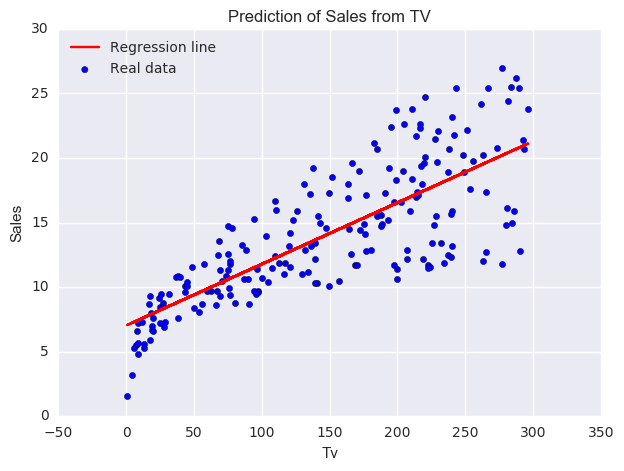

In [85]:
#Plot the TV and Sales values with the regression line.
lr.plot(X,y)

## Exercise 4 - Check via Statsmodels or Scikit-learn

In [64]:
import statsmodels.api as sm

X_sm=sm.add_constant(X)
re=sm.OLS (y, X_sm).fit()

In [66]:
print(re.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 30 Jun 2017   Prob (F-statistic):           1.47e-42
Time:                        19:17:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

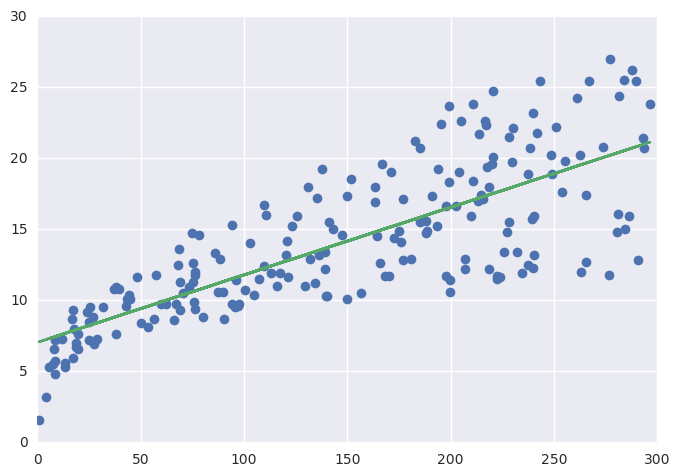

In [70]:
plt.plot(X, y,'o')
plt.plot(X, re.predict(), '-')

# Additional Optional Exercises

- Train / test split with RMSE calculation
- Proper documentation for class methods and attributes
- Build with NumPy methods and compare computation time
- Multiple Linear Regression (SGD covered in Advanced Regression Unit)